In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c16615650fbd05031c557d1c2e0a60


In [3]:
# Create a set of random latitude and longitude combinations.
# Create 1500 random latitude and longitude coordinates 
lat = np.random.uniform(-90, 90, size = 1500)
lngs = np.random.uniform(-180, 180, size = 1500)
lat_lngs = zip(lat, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
# The counters was initialized at 1 so that the first iteration fo the logging and  the set to start at 1
record_count = 1
set_count = 1

# Loop through all the cities in our list. 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1 
        time.sleep(60)
        
        # Create URL for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
        # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    

    
    # Log URL, set, and record numbers for each city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

    
# Make an API request for each city 
    try:
       
        # Parse the JSON and recieve data
        city_weather = requests.get(city_url).json()

        # Compile needed data
        city_city = city.title()
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_hum = city_weather['main']['humidity']
        city_cloud = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
       
    # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Fill City Data list into city_data list. 
        city_data.append({"City": city.title(),
                         "Country": city_country,
                         "Date": city_date,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_hum,
                         "Cloudiness": city_cloud,
                         "Wind Speed": city_wind,
                         })
    #If an error occurs skip city
    except: 
        print("City not found. Skipping")
        pass

    # Indicate that the Data Loading is Complete.    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | torbay
Processing Record 2 of Set 1 | haines junction
Processing Record 3 of Set 1 | santiago
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | tendukheda
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | coaldale
Processing Record 10 of Set 1 | falealupo
City not found. Skipping
Processing Record 11 of Set 1 | cidreira
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | zaysan
Processing Record 15 of Set 1 | yarmouth
Processing Record 16 of Set 1 | marcona
City not found. Skipping
Processing Record 17 of Set 1 | vallenar
Processing Record 18 of Set 1 | cap-aux-meules
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | dhule
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 

Processing Record 38 of Set 4 | east london
Processing Record 39 of Set 4 | arraial do cabo
Processing Record 40 of Set 4 | si chiang mai
Processing Record 41 of Set 4 | port-gentil
Processing Record 42 of Set 4 | matara
Processing Record 43 of Set 4 | sibolga
Processing Record 44 of Set 4 | khonuu
City not found. Skipping
Processing Record 45 of Set 4 | yeppoon
Processing Record 46 of Set 4 | mentok
City not found. Skipping
Processing Record 47 of Set 4 | hirado
Processing Record 48 of Set 4 | khorixas
Processing Record 49 of Set 4 | atar
Processing Record 50 of Set 4 | metro
Processing Record 1 of Set 5 | taree
Processing Record 2 of Set 5 | buchanan
Processing Record 3 of Set 5 | beya
Processing Record 4 of Set 5 | ballina
Processing Record 5 of Set 5 | rameshki
Processing Record 6 of Set 5 | lompoc
Processing Record 7 of Set 5 | strabychovo
Processing Record 8 of Set 5 | escanaba
Processing Record 9 of Set 5 | geraldton
Processing Record 10 of Set 5 | broken hill
Processing Record 

Processing Record 23 of Set 8 | sterling
Processing Record 24 of Set 8 | sayyan
Processing Record 25 of Set 8 | otavi
Processing Record 26 of Set 8 | sydney
Processing Record 27 of Set 8 | dayong
Processing Record 28 of Set 8 | kalabugao
City not found. Skipping
Processing Record 29 of Set 8 | atasu
Processing Record 30 of Set 8 | tilichiki
Processing Record 31 of Set 8 | araouane
Processing Record 32 of Set 8 | sulina
Processing Record 33 of Set 8 | nouadhibou
Processing Record 34 of Set 8 | pasni
Processing Record 35 of Set 8 | bogande
Processing Record 36 of Set 8 | kuala terengganu
Processing Record 37 of Set 8 | te anau
Processing Record 38 of Set 8 | yumen
Processing Record 39 of Set 8 | tuktoyaktuk
Processing Record 40 of Set 8 | rancho palos verdes
Processing Record 41 of Set 8 | sonoita
Processing Record 42 of Set 8 | huicungo
Processing Record 43 of Set 8 | lata
Processing Record 44 of Set 8 | la plata
Processing Record 45 of Set 8 | mullaitivu
City not found. Skipping
Proces

Processing Record 11 of Set 12 | port moresby
Processing Record 12 of Set 12 | hyeres
Processing Record 13 of Set 12 | blackfoot
Processing Record 14 of Set 12 | rocha
Processing Record 15 of Set 12 | vangaindrano
Processing Record 16 of Set 12 | itatiaia
Processing Record 17 of Set 12 | alice springs
Processing Record 18 of Set 12 | findlay
Processing Record 19 of Set 12 | wadena
Processing Record 20 of Set 12 | san juan de los morros
Processing Record 21 of Set 12 | los llanos de aridane
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | hofn
Processing Record 24 of Set 12 | halalo
City not found. Skipping
Processing Record 25 of Set 12 | souillac
Processing Record 26 of Set 12 | pacifica
Processing Record 27 of Set 12 | redlands
Processing Record 28 of Set 12 | kathu
Processing Record 29 of Set 12 | vaitape
Processing Record 30 of Set 12 | veraval
Processing Record 31 of Set 12 | novouzensk
Processing Record 32 of Set 12 | ulaangom
Processing Record 33 of Set 

In [ ]:
np.random.uniform(size = 500)

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Torbay,CA,2022-05-03 22:34:09,47.6666,-52.7314,44.28,88,75,11.50
1,Haines Junction,CA,2022-05-03 22:34:37,60.7522,-137.5108,46.35,46,92,8.05
2,Santiago,CL,2022-05-03 22:37:12,-33.4569,-70.6483,78.24,33,0,10.36
3,Tasiilaq,GL,2022-05-03 22:34:01,65.6145,-37.6368,26.76,86,100,5.10
4,Atuona,PF,2022-05-03 22:34:08,-9.8000,-139.0333,79.41,79,19,17.85
5,Kapaa,US,2022-05-03 22:32:27,22.0752,-159.3190,80.92,76,75,14.97
6,Tendukheda,IN,2022-05-03 22:37:27,23.4000,79.5500,89.51,24,77,4.70
7,Ushuaia,AR,2022-05-03 22:28:56,-54.8000,-68.3000,42.46,61,20,16.11
8,Coaldale,CA,2022-05-03 22:37:30,49.7167,-112.6185,69.31,26,75,3.44
9,Cidreira,BR,2022-05-03 22:29:26,-30.1811,-50.2056,64.26,92,100,20.38


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Pull revelant Data from DF
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
hum = city_data_df["Humidity"]
clouds = city_data_df["Cloudiness"]
wind = city_data_df["Wind Speed"]

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig1.png'

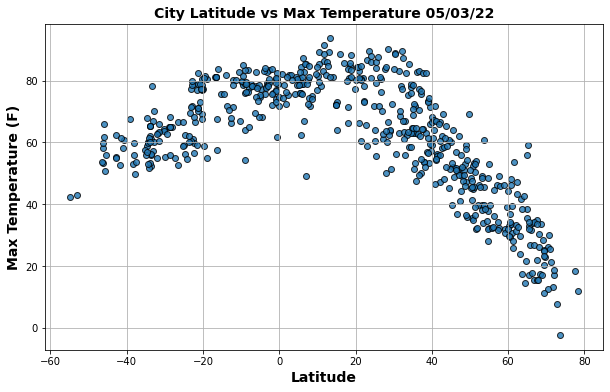

In [10]:
# Create Scatter Chart for Lat vs Max Temp
plt.subplots(figsize=(10,6))
plt.scatter(lat, max_temp, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Max Temperature " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Max Temperature (F)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig1.png')
plt.show

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig2.png'

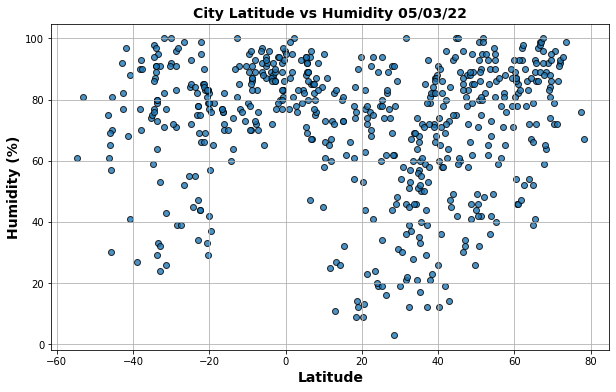

In [11]:
# Create Scatter Chart for Lat vs Humidity
plt.subplots(figsize=(10,6))
plt.scatter(lat, hum, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Humidity " + time.strftime('%x'), fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='demi', fontsize=14)
plt.ylabel("Humidity (%)", fontweight=550, fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig2.png')
plt.show

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig3.png'

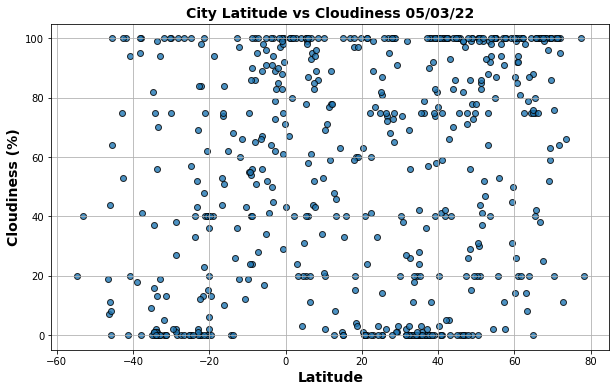

In [12]:
# Create Scatter Chart for Lat vs Cloudiness
plt.subplots(figsize=(10,6))
plt.scatter(lat, clouds, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Cloudiness " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Cloudiness (%)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig3.png')
plt.show

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig4.png'

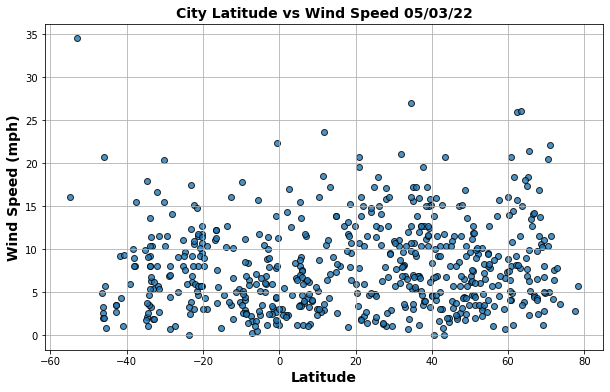

In [13]:
# Create Scatter Chart for Lat vs Wind Speed
plt.subplots(figsize=(10,6))
plt.scatter(lat, wind, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Wind Speed " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Wind Speed (mph)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig4.png')
plt.show

In [14]:
# Create a linear regression function 
def plot_linear_regression(x_values, y_values, title, y_label, text_coord):
    
    # Get linear regression data 
    (slope, intercept, r_value, p_value, stderr) = linregress(x_values, y_values)
    lin_reg_lst = (slope, intercept, r_value, p_value, stderr)
    lin_reg_df = pd.DataFrame({"Slope":slope,
                               "Intercept":intercept,
                               "r Value":r_value,
                               "p Value":p_value,
                               "Std Error":stderr}, index=[0])
    
    print(lin_reg_df)
    # Calculate regress y_values using linear regression data above 
    regress_values = x_values * slope + intercept
    
    # Get equation for linear regression line 
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create Scatter plot with linear regression line 
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="r")
    
    # Annotate text for linear regression equation 
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    
    # Add title and labels
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DFs
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [16]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature",
                       "Max Temperature (F)", (5,40))
plt.savefig('weather_data/Fig5.png')

NameError: name 'linregress' is not defined

In [17]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature",
                       "Max Temperature (F)", (-30,36))
plt.savefig('weather_data/Fig6.png')

NameError: name 'linregress' is not defined

In [18]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Linear Regression on the Northern Hemisphere \n for Humidity ",
                       "Humidity (%)", (0,5))
plt.savefig('weather_data/Fig7.png')

NameError: name 'linregress' is not defined

In [19]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Linear Regression on the Southern Hemisphere \n for Humidity ",
                       "Humidity (%)", (-30,5))
plt.savefig('weather_data/Fig8.png')

NameError: name 'linregress' is not defined

In [20]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Linear Regression on the Northern Hemisphere \n for Cloudiness",
                       "Cloudiness (%)", (0,28))
plt.savefig('weather_data/Fig9.png')

NameError: name 'linregress' is not defined

In [21]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Linear Regression on the Southern Hemisphere \n for Cloudiness",
                       "Cloudiness (%)", (-55,8))
plt.savefig('weather_data/Fig10.png')

NameError: name 'linregress' is not defined

In [22]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed",
                       "Wind Speed (mph)", (45,26))
plt.savefig('weather_data/Fig11.png')

NameError: name 'linregress' is not defined